In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve,precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import RUSBoostClassifier,BalancedRandomForestClassifier #63 84
from imblearn.ensemble import BalancedBaggingClassifier #69 74
from sklearn.metrics import make_scorer, f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold
import shap
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
import catboost as cat
from scipy.stats import mstats
from scipy.stats.mstats import winsorize
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline


In [50]:
import numpy as np
from scipy.stats.mstats import winsorize
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-焦虑抑郁-维度数据.csv"
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-焦虑抑郁-维度数据-排除人口学信息.csv"

Dataset = pd.read_csv(fpath)

Dataset['Yincome'] = winsorize(Dataset['Yincome'], limits=[0.05, 0.05])

Dataset.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-焦虑抑郁-维度数据-Yincome.csv")

In [19]:
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


In [51]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-焦虑抑郁-维度数据.csv"
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-焦虑抑郁-维度数据-排除人口学信息.csv"

Dataset = pd.read_csv(fpath)
# corr_matrix = Dataset.corr()

# sns.heatmap(corr_matrix, annot=True)


[array([[ 0.25374958,  0.07618028,  0.06150035, ..., -0.1807638 ,
         0.17464784, -0.03321619],
       [-0.17880994, -0.00516058, -0.04798983, ..., -0.3068499 ,
         0.05643626, -0.06163637],
       [-0.03991866, -0.2790919 ,  0.90075564, ..., -0.23792988,
         0.11702693,  0.07188275],
       ...,
       [-0.18984278,  0.10405094, -0.02823318, ...,  1.5048012 ,
         0.01474292,  0.27632347],
       [-0.23527789,  0.02582833, -0.05007505, ..., -0.4372407 ,
         0.27953166, -0.03961498],
       [-0.06289085,  0.03305065, -0.00479845, ..., -0.24711083,
        -0.65253013, -0.06495106]], dtype=float32), array([[-1.8418206e-02, -7.2826736e-04, -6.9362107e-03, ...,
         5.3861875e-02,  4.1163288e-02, -1.9879599e-01],
       [-8.8569280e-03,  2.6380397e-02,  1.2461376e-01, ...,
         3.4623869e-02,  1.0635696e-01, -1.2603556e-01],
       [ 1.2202161e-02, -6.1609317e-02,  3.1392235e-02, ...,
         1.4026670e-01,  5.9842791e-02, -1.7430967e-01],
       ...,
    

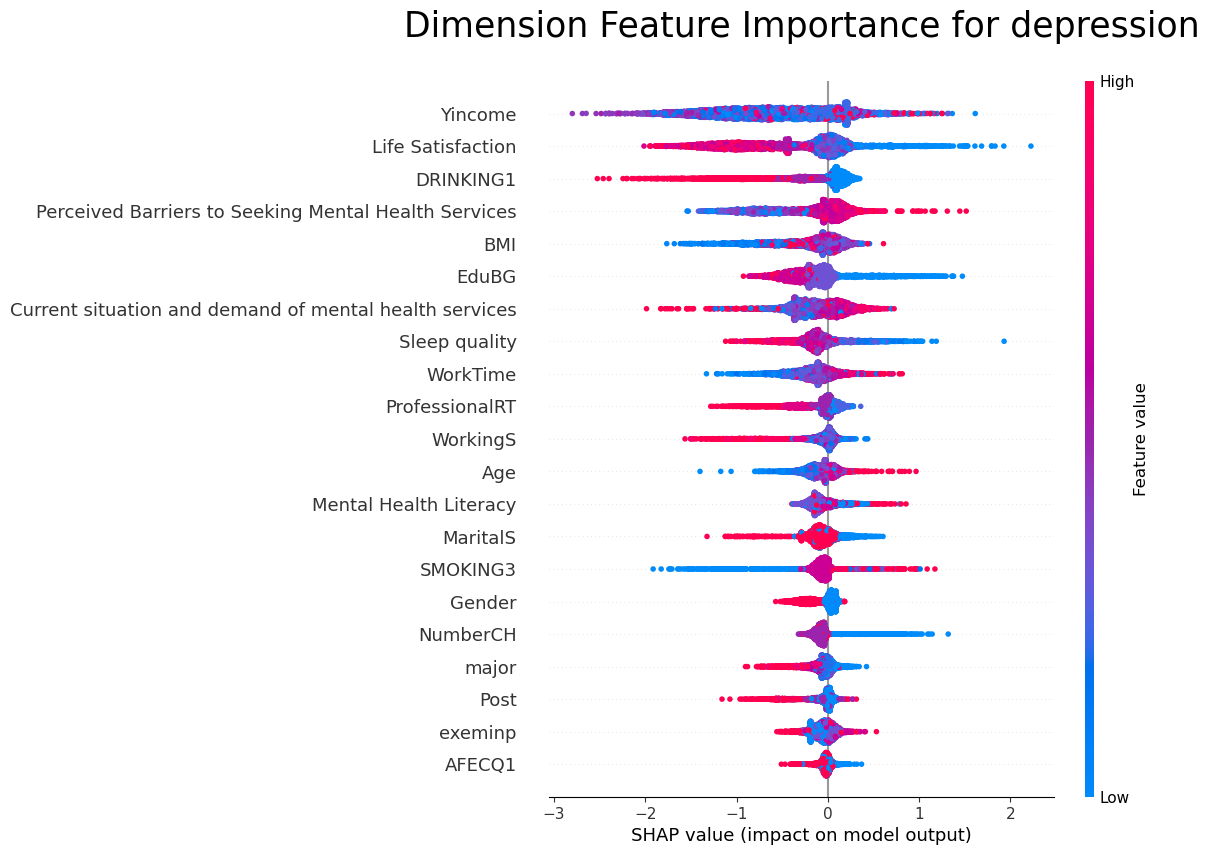

In [53]:
Dataset['Yincome'] = winsorize(Dataset['Yincome'], limits=[0.05, 0.05])

y = Dataset['depression']
x = Dataset.drop(labels=['depression','anxiety'], axis=1)

feature_names = np.array(x.columns)
names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 42
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
rfc = xgb.XGBClassifier(learning_rate=0.1,objective='multi:softmax', 
                         n_estimators = 300, num_class=3)
rfc.fit(x_train_resampled, y_train_resampled)
# 使用内联模式显示图像
%matplotlib inline

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_test)
print(shap_values)
class_names = [
    'No Depression',
    'Mild Depression',
    'Severe Depression'
]
plt.subplots()
shap.summary_plot(shap_values[2],x_test, plot_type='dot', feature_names=feature_names,max_display=30, class_names=class_names,plot_size=(12, 8),show=False)
plt.title('Dimension Feature Importance for depression', fontsize = 25, y = 1.05)

plt.show()
plt.close()



重采样后的类别分布： Counter({2: 5404, 1: 5221, 0: 3057})
预测数据: Counter({0: 3291, 1: 613, 2: 82})
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      3291
           1       0.21      0.42      0.28       613
           2       0.09      0.20      0.12        82

    accuracy                           0.63      3986
   macro avg       0.39      0.43      0.39      3986
weighted avg       0.75      0.63      0.67      3986

Recall: 0.63 Accuracy: 62.62


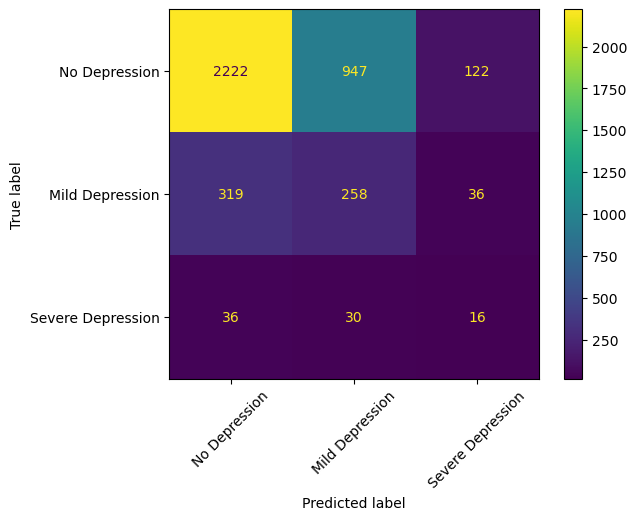

F1:  0.6707923710065408
{'fit_time': array([5.8402071 , 5.92501283, 6.12025595, 6.16618609, 6.5731647 ]), 'score_time': array([0.01272988, 0.01475811, 0.01349306, 0.02072406, 0.01414227]), 'test_accuracy': array([0.79685787, 0.93058093, 0.93128655, 0.9254386 , 0.93567251]), 'test_precision': array([nan, nan, nan, nan, nan]), 'test_recall': array([nan, nan, nan, nan, nan]), 'test_f1': array([nan, nan, nan, nan, nan])}


In [33]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-焦虑抑郁-维度数据.csv"
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-焦虑抑郁-维度数据-排除人口学信息.csv"

data = pd.read_csv(fpath)
random_state=42
y = data['depression']
x = data.drop(labels=['depression','anxiety'], axis=1)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

# 过采样
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("重采样后的类别分布：", Counter(y_train_resampled))
weights = np.sum(y_train == 0) / np.sum(y_train == 2)

# brfc = RandomForestClassifier(random_state=random_state, n_estimators=100)
brfc = xgb.XGBClassifier(learning_rate=0.1,objective='multi:softmax', n_estimators = 300, num_class=3)
# brfc = BalancedRandomForestClassifier(n_estimators=200, random_state=42)

brfc.fit(x_train_resampled, y_train_resampled)
y_pred = brfc.predict(x_test)

print("预测数据:", Counter(y_test))
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))
# 绘制混淆矩阵
label_dict = {
    0: 'No Depression',
    1: 'Mild Depression',
    2: 'Severe Depression'
}

y_test_text = [label_dict[label] for label in y_test]
y_pred_text = [label_dict[label] for label in y_pred]
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=list(label_dict.values()))

disp_text = ConfusionMatrixDisplay(confusion_matrix=cm_text, display_labels=list(label_dict.values()))
disp_text.plot()
plt.xticks(rotation=45)
plt.show()

print('F1: ', f1)
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform 5-fold cross-validation on the model

cv_results = cross_validate(brfc,x_train_resampled, y_train_resampled, cv=5, scoring=scoring)
print(cv_results)
# Print the average score for each metric
# print("Accuracy: ", cv_results['test_accuracy'].mean())
# print("Precision: ", cv_results['test_precision'].mean())
# print("Recall: ", cv_results['test_recall'].mean())
# print("F1 score: ", cv_results['test_f1'].mean())




预测数据: Counter({1: 2022, 0: 1964})
              precision    recall  f1-score   support

           0       0.68      0.58      0.62      1964
           1       0.64      0.73      0.68      2022

    accuracy                           0.66      3986
   macro avg       0.66      0.65      0.65      3986
weighted avg       0.66      0.66      0.65      3986

Recall: 0.66 Accuracy: 65.60


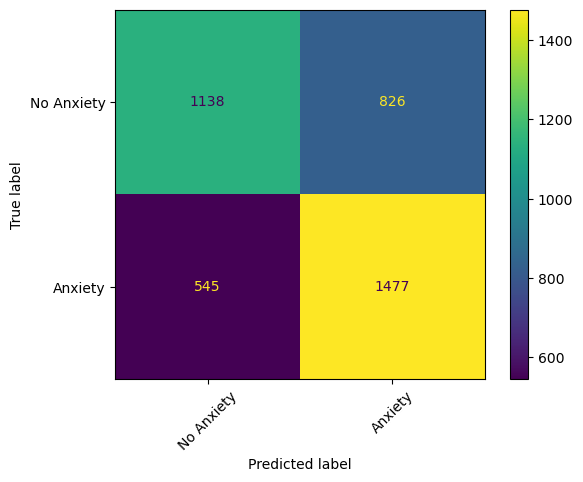

F1:  0.6539689329179452


In [40]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-焦虑抑郁-维度数据.csv"
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-焦虑抑郁-维度数据-排除人口学信息.csv"

Dataset = pd.read_csv(fpath)
random_state=42
y = Dataset['anxiety']
x = Dataset.drop(labels=['depression','anxiety'], axis=1)

# num_cols = ["WorkingS", "NumberCH","BMI","Age","Yincome"]
# all_columns = list(data.columns)

# # 选择需要的列
# class_columns = [col for col in all_columns if col not in num_cols]
# one_hot = OneHotEncoder(handle_unknown="ignore")
# one_hot.fit(data[class_columns])
# cat_features = one_hot.transform(data[class_columns]).toarray()

# # 将连续特征进行标准化
# scaler = StandardScaler()
# scaler.fit(data[num_cols])
# num_features = scaler.transform(data[num_cols])

# # 合并离散特征和连续特征
# features = np.concatenate((cat_features, num_features), axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

# brfc = RandomForestClassifier(n_estimators=200, random_state=random_state)
brfc = xgb.XGBClassifier(n_estimators=300,learning_rate=0.01)
# brfc = BalancedRandomForestClassifier(n_estimators=300, random_state=42)

# brfc = SVC()
brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)

print("预测数据:", Counter(y_test))
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))
# 绘制混淆矩阵
label_dict = {
    0: 'No Anxiety',
    1: 'Anxiety'
}

y_test_text = [label_dict[label] for label in y_test]
y_pred_text = [label_dict[label] for label in y_pred]
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=list(label_dict.values()))

disp_text = ConfusionMatrixDisplay(confusion_matrix=cm_text, display_labels=list(label_dict.values()))
disp_text.plot()
plt.xticks(rotation=45)
plt.show()
print('F1: ', f1)
# scoring = ['accuracy', 'precision', 'recall', 'f1']

# # Perform 5-fold cross-validation on the model

# cv_results = cross_validate(brfc,x_train_resampled, y_train_resampled, cv=5, scoring=scoring)

# # Print the average score for each metric
# print("Accuracy: ", cv_results['test_accuracy'].mean())
# print("Precision: ", cv_results['test_precision'].mean())
# print("Recall: ", cv_results['test_recall'].mean())
# print("F1 score: ", cv_results['test_f1'].mean())




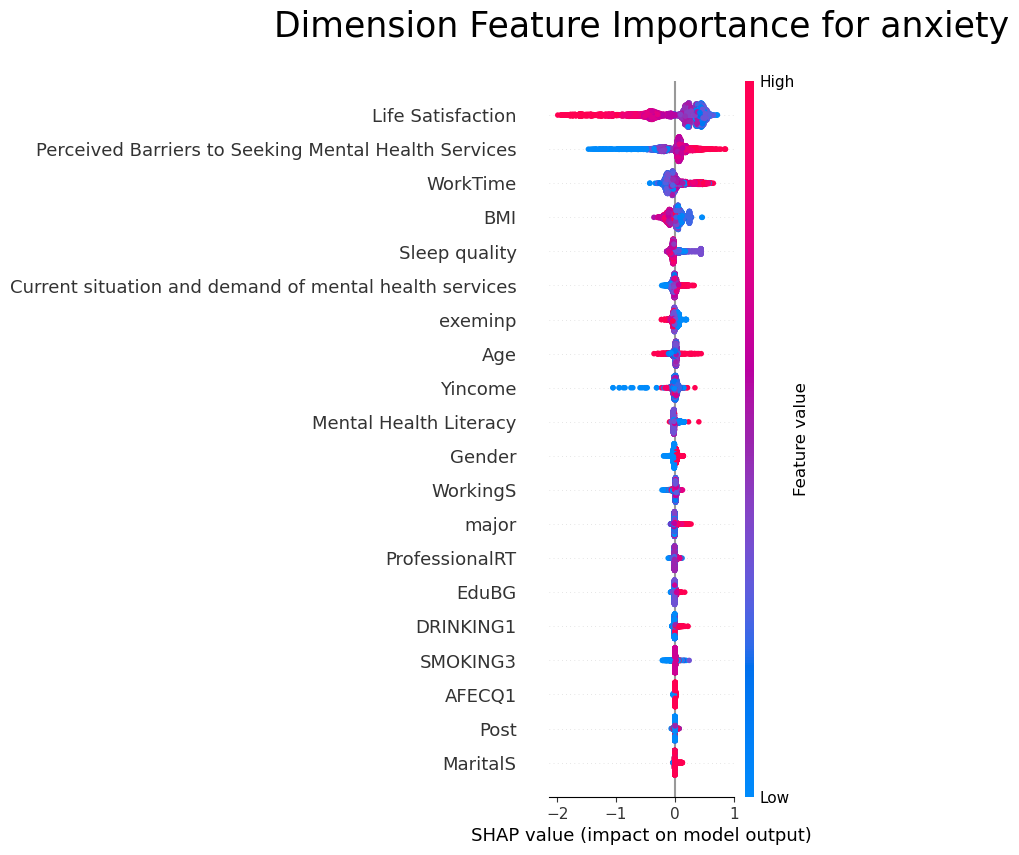

In [24]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-焦虑抑郁-维度数据.csv"
Dataset = pd.read_csv(fpath)
y = Dataset['anxiety']
x = Dataset.drop(labels=['depression','anxiety'], axis=1)

feature_names = np.array(x.columns)
names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
# rfc = RandomForestClassifier(max_depth=20,n_estimators=200, random_state=random_state,min_samples_split=2)
rfc = xgb.XGBClassifier(n_estimators=300,learning_rate=0.01)

rfc.fit(x_train, y_train)
# 使用内联模式显示图像
%matplotlib inline
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_test)
class_names = [
    'No Anxiety',
    'Anxiety'
]
plt.subplots()
shap.summary_plot(shap_values, x_test, class_names=class_names, max_display=20,plot_size=(8, 8),show=False,plot_type="dot")
plt.title('Dimension Feature Importance for anxiety', fontsize = 25, y = 1.05)
plt.show()
plt.close()

